# Import Data

In [1]:
# import modules
import pandas as pd

In [2]:
# import raw data
df = pd.read_csv('dataframes/pos_df.csv')
df.sample(3)

,Sample Name,CAS9-A,CAS9-A.1,CAS9-B,CAS9-B.1,CAV_A,CAV_A.1,CAV_B,CAV_B.1,CAVIN_A,...,SPTLC_B,SPTLC_B.1,UGCG-A,UGCG-A.1,UGCG-B,UGCG-B.1,WT_A,WT_A.1,WT_B,WT_B.1
3512,PG 42:12 (-PG (NH4)),30.0,40.0,39.0,24.0,32.0,28.0,22.0,0.0,0.0,...,0.0,49.0,0.0000,0.0,0.0,0.0,25.0,29.0,0.0,25.0
4540,DAG 34:0+NH4 (-FA 14:0 (NH4)),612.0,750.0,747.0,678.0,0.0,0.0,493.0,519.0,1057.0,...,181.0,177.0,263.0000,312.0,0.0,0.0,1371.0,0.0,0.0,0.0
3250,"SGalCer 35:4;2 (LCB 18:1;2-H2O,LCB 18:0;3-2H2O)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,21.7706,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# import lipid metadata
df_meta = pd.read_csv('dataframes/pos_lipids_df_meta.csv')
df_meta.sample(3)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
1008,MMPE 36:0 (-MMPE),MMPE,36,0
4232,MADAG 54:10+NH4 (-FA 18:1 (NH4)),MADAG,54,10
4721,MADAG 56:11+NH4 (-FA 22:1 (NH4)),MADAG,56,11


In [4]:
# import experiment metedata
df_exps = pd.read_csv('dataframes/pos_exps_df_meta.csv')
df_exps.head()

,sample,protein
0,CAS9-A,CAS9
1,CAS9-A.1,CAS9
2,CAS9-B,CAS9
3,CAS9-B.1,CAS9
4,CAV_A,CAV


In [5]:
# import head group metadata
df_hg = pd.read_csv('dataframes/pos_df_hg.csv')
df_hg.head(3)

,Head Group,Head Group 2
0,Hex2Cer,Hex_Cer
1,GT3,GT
2,GT2,GT


In [6]:
# merge df_hg and df_meta
df_meta2 = df_meta.merge(df_hg, on=['Head Group'])
df_meta2.head(1)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,Head Group 2
0,Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),Hex2Cer,26,3,Hex_Cer


In [7]:
# rename columns by protein
df_p = df.rename(columns=df_exps.set_index('sample')['protein'])
df_p = df_p.drop(columns=['RAJU'])
df_p = df_p.set_index('Sample Name')
df_p.columns.names=['protein']
df_p.head(1)

protein,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0,143.0,125.0,132.0,171.6091,182.9007,120.0,120.0,281.3523,184.3462,...,130.0,142.0,68.0529,46.4729,88.0,91.0,229.5233,278.1255,206.0,182.0


# Normalize Data

In [8]:
# define functions to normalize down column
def norm_col(df):
    return df/df.sum()

In [10]:
def norm_row(df):
    return df.div(df.sum(axis=1), axis=0)

In [14]:
# move sample name column into index
df_norm = df_p
df_norm.head(1)

protein,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),167.0,143.0,125.0,132.0,171.6091,182.9007,120.0,120.0,281.3523,184.3462,...,130.0,142.0,68.0529,46.4729,88.0,91.0,229.5233,278.1255,206.0,182.0


In [15]:
# normalize down the columns
df_norm_col = df_norm/df_norm.sum()
df_norm_col.head(1)

protein,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.000051,0.000043,0.000034,0.000037,0.000064,0.000071,0.000054,0.000051,0.000099,0.000063,...,0.000055,0.000055,0.000028,0.00002,0.000038,0.000038,0.000069,0.000079,0.000065,0.000059


In [16]:
# normalize across row
df_norm_row = df_norm.div(df_norm.sum(axis=1), axis=0)
df_norm_row.head(1)

protein,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.024047,0.020591,0.017999,0.019007,0.024711,0.026337,0.017279,0.017279,0.040513,0.026545,...,0.018719,0.020447,0.009799,0.006692,0.012672,0.013104,0.03305,0.040049,0.029663,0.026207


In [17]:
# normalize across both row & col
df_norm = df_norm_col.div(df_norm_col.sum(axis=1), axis=0)
df_norm.head(1)

protein,CAS9,CAS9,CAS9,CAS9,CAV,CAV,CAV,CAV,CAVIN,CAVIN,...,SPTLC,SPTLC,UGCG,UGCG,UGCG,UGCG,WT,WT,WT,WT
Sample Name,,,,,,,,,,,,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.019386,0.01633,0.013035,0.014141,0.024368,0.026699,0.020384,0.019259,0.037534,0.023768,...,0.020674,0.02069,0.010729,0.007418,0.014324,0.014395,0.026216,0.02971,0.024503,0.022342


# Average/groupby protein

In [18]:
# normalized by row & col
df_norm_avg = df_norm.T.reset_index().rename(columns={'index':'protein'})
df_norm_avg = df_norm_avg.groupby('protein').mean().T
df_norm_avg.head()

protein,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG,WT
Sample Name,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.015723,0.022677,0.028030,0.032593,0.030614,0.033753,0.030094,0.019106,0.011717,0.025692
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.063167,0.031661,0.011753,0.013816,0.012529,0.021357,0.030603,0.001767,0.048079,0.015267
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.011928,0.031714,0.021564,0.026191,0.031537,0.030011,0.024812,0.027692,0.022955,0.021594
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),0.017331,0.041129,0.021072,0.030146,0.025244,0.031376,0.016051,0.021227,0.025926,0.020498
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),0.029132,0.024486,0.019600,0.021288,0.024933,0.021520,0.018774,0.030695,0.037175,0.022397


In [19]:
# normalized by row only
df_norm_row_avg = df_norm_row.T.reset_index().rename(columns={'index':'protein'})
df_norm_row_avg = df_norm_row_avg.groupby('protein').mean().T
df_norm_row_avg.head()

protein,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG,WT
Sample Name,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.020411,0.021402,0.031956,0.028405,0.027034,0.033241,0.027860,0.016882,0.010567,0.032242
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.078368,0.028599,0.013087,0.011465,0.010702,0.019837,0.027584,0.001504,0.041317,0.017536
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.015926,0.030322,0.025096,0.023253,0.028544,0.030185,0.023401,0.024605,0.021097,0.027571
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),0.022769,0.038518,0.024130,0.026532,0.022645,0.031431,0.015468,0.018809,0.023712,0.025986
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),0.037998,0.022715,0.022420,0.018439,0.021945,0.021170,0.017250,0.026798,0.033455,0.027809


In [20]:
# normalized by row only
df_norm_col_avg = df_norm_col.T.reset_index().rename(columns={'index':'protein'})
df_norm_col_avg = df_norm_col_avg.groupby('protein').mean().T
df_norm_col_avg.head()

protein,CAS9,CAV,CAVIN,CERS2-1g,CERS2_mg,CERS5,Flot2,SPTLC,UGCG,WT
Sample Name,,,,,,,,,,
Hex2Cer 26:3;2 (LCB 18:0;2-2H2O),0.000042,0.000060,0.000074,0.000086,0.000081,0.000089,0.000080,5.050609e-05,0.000031,0.000068
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.000017,0.000008,0.000003,0.000004,0.000003,0.000006,0.000008,4.682961e-07,0.000013,0.000004
Hex2Cer 26:2;2 (LCB 18:0;2-2H2O),0.000047,0.000125,0.000085,0.000103,0.000124,0.000118,0.000098,1.092019e-04,0.000091,0.000085
Hex2Cer 26:2;2 (LCB 18:0;2-H2O),0.000013,0.000032,0.000016,0.000023,0.000020,0.000024,0.000012,1.652543e-05,0.000020,0.000016
Hex2Cer 26:0;2 (LCB 18:0;2-2H2O),0.000113,0.000095,0.000076,0.000082,0.000096,0.000083,0.000073,1.186240e-04,0.000144,0.000087


# Correlation Matrix, whole dataset

In [21]:
import seaborn as sns

In [22]:
df_corr = df_norm_avg.corr()

<AxesSubplot:xlabel='protein', ylabel='protein'>

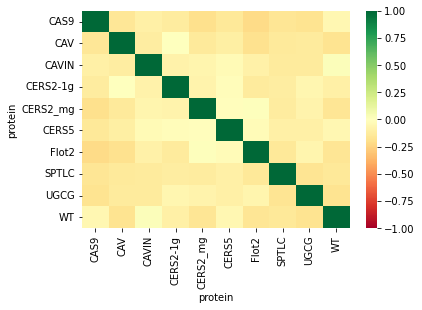

In [23]:
sns.heatmap(df_corr, vmin=-1.0,vmax=1.0, cmap='RdYlGn')

# Clustermap, whole dataset

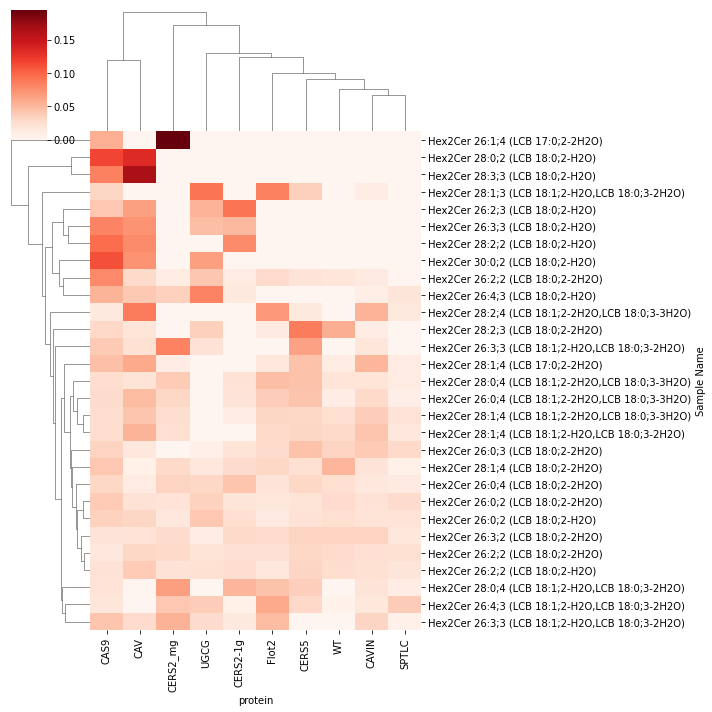

In [24]:
sns.clustermap(df_norm_row_avg.iloc[:29], cmap='Reds')

# Correlation matrix

In [25]:
def corr_matrix(df_meta, df_p, col, drop_var=[], drop_protein=[], title='Correlation Matrix', annot=False):
    # create merged df with variable of interest
    df = df_meta[['Sample Name', col]].merge(df_p, on='Sample Name')
    
    # drop rows and columns
    if drop_var != []:
        df = df[~df[col].isin(drop_var)]
        
    if drop_protein != []:
        df = df.drop(columns=drop_protein)
    
    # group by variable of interest
    df = df.groupby(col).sum()
    # normalize by the sample
    df = norm_col(df)
    
    # name columns so that we can group by them once transposed
    df.columns.names=['protein']
    # transpose and then find the average value for each protein
    df = df.T.groupby('protein').mean()
    
    # normalize by the variable (column)
    df = norm_col(df)
    
    # transpose again so proteins are columns, then run a correlation matrix
    corr = df.T.corr()
    
    sns.heatmap(corr, vmin=-1, vmax=1, cmap='RdYlGn', annot=annot).set_title(title)

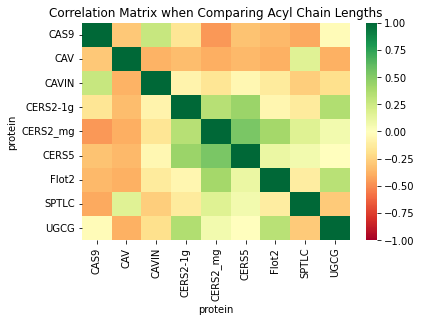

In [33]:
corr_matrix(df_meta2, df_p, 
            col='Acyl Chain Length', 
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Acyl Chain Lengths'
           )

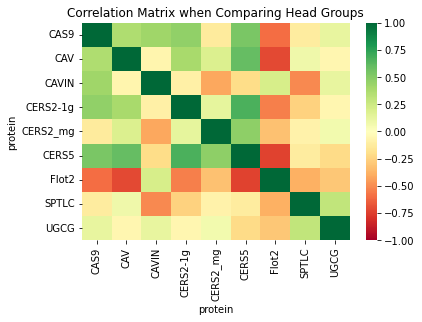

In [30]:
corr_matrix(df_meta2, df_p, 
            col='Head Group 2', 
            drop_var=['PE', 'PC'],
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Head Groups'
           )

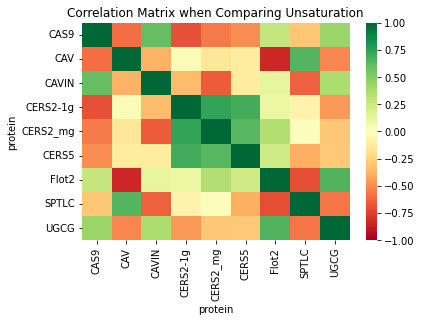

In [31]:
corr_matrix(df_meta2, df_p, 
            col='Unsaturation', 
            drop_protein=['WT'], 
            title='Correlation Matrix when Comparing Unsaturation'
           )